In [2]:
import pandas as pd
import json

import numpy as np

In [11]:
df = pd.read_csv('mercadona.csv')

df.drop(inplace=True, columns=['image_url', 'measure_unit', 'datetime', 'supermarket', 'subcategory'])

df.to_csv('/home/ruiz/Documents/Projects/shoppingtrolleyAI/supermarket/data/clean_mercadona.csv',index=False)

thousand_prods = df.sample(1000)
thousand_prods.head()


,name,price,category
819,Pasta Penne integral Hacendado,1.2,"Arroz, legumbres y pasta"
6412,Barritas para periquitos de fruta y miel Natura,1.5,Mascotas
1379,Toallitas bebé pieles con tendencia atópica De...,1.6,Bebé
5626,Sombra de ojos perlada Deliplus 16,3.0,Maquillaje
2992,Croquetas de merluza y gambas Preli ultraconge...,1.5,Congelados


,name,price,category
7060,Bocaditos de crema,3.90,Panadería y pastelería
1267,Papilla manzana y plátano +6 meses Hacendado,3.99,Bebé
1771,Vino rosado espumoso Mateus,3.99,Bodega
2470,Hamburguesas de pavo y espinacas,1.95,Carne
6303,Paté perro adulto Bobby,0.57,Mascotas


Categories: 17


<Axes: >

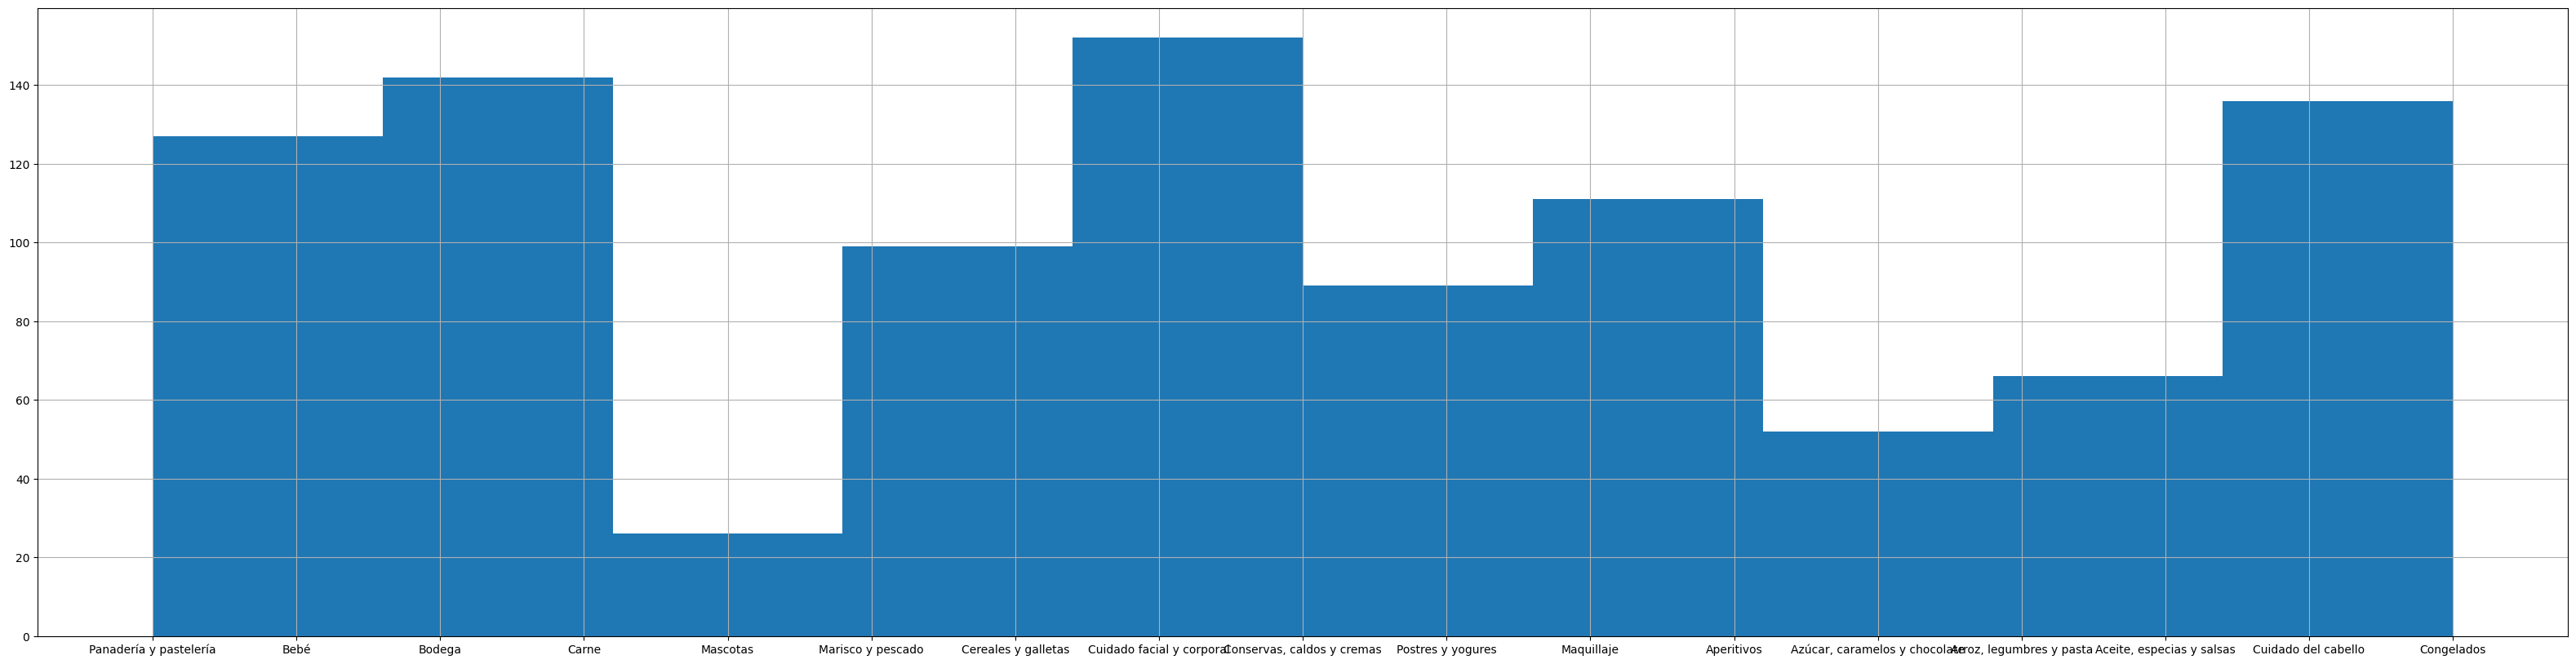

In [5]:
no_cats = thousand_prods.category.nunique()

print(f'Categories: {no_cats}')

thousand_prods['category'].hist(figsize=(40,10))

In [6]:
categories = thousand_prods['category'].unique()

In [7]:
categories = thousand_prods['category'].unique()

supermarket = {}

# Limiting to the first 14 categories
limited_categories = categories[:14] # Should be limited to the number of Aisles

for cat in limited_categories:
    # Convert the selected DataFrame to a list of dictionaries instead of numpy array to avoid serialization issues
    supermarket[cat] = thousand_prods[thousand_prods['category'] == cat][['name', 'price']].to_dict('records')

# Save the supermarket dictionary to a JSON file
with open('/home/ruiz/Documents/Projects/shoppingtrolleyAI/supermarket/data/products.json', 'w') as file:
    json.dump(supermarket, file)


In [8]:
from pprint import pprint


In [9]:
with open('/home/ruiz/Documents/Projects/shoppingtrolleyAI/supermarket/data/array.txt', 'r') as file:
    lists = file.read(-1)

In [10]:
products = eval(lists)

SyntaxError: invalid syntax (<string>, line 0)